In [ ]:
# Install FEniCS
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-release-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh";
    from dolfin import *

--2025-04-16 13:14:17--  https://fem-on-colab.github.io/releases/fenics-install-release-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.109.153, 185.199.108.153, 185.199.111.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4180 (4.1K) [application/x-sh]
Saving to: ‘/tmp/fenics-install.sh’

/tmp/fenics-install 100%[===================>]   4.08K  --.-KB/s    in 0s      

2025-04-16 13:14:18 (21.4 MB/s) - ‘/tmp/fenics-install.sh’ saved [4180/4180]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICS_INSTALLED=/usr/local/share/fem-on-colab/fenics.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenics.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/38ac8c13/releases/pybi

In [ ]:
from dolfin import *
import matplotlib.pyplot as plt
import numpy as np

# Resolución de losa de Kirchhoff-Love

Si tenemos un rectángulo con los bordes fijos su ecuación esta dada por $\frac{\partial^4 w}{\partial x^4} + 2\frac{\partial^4 w}{\partial x^2 \partial y^2} + \frac{\partial^4 w}{\partial y^4} = \frac{q(x,y)}{D(x,y)}$

Con condiciones de borde: $w(x)=0$  y $\frac{\partial^2 w}{\partial x^2}=\frac{\partial^2 w}{\partial y^2}=0$, en $\partial\Omega$

En donde $w$ es el campo de desplazamiento, $q$ es la carga y $D$ esta asociado a las caracterísitcas del material de la losa.

Lo primero es reescribir la ecuación. Para esto usamos que $\Delta w = \frac{\partial^2 w}{\partial x^2} + \frac{\partial^2 w}{\partial y^2}$ (el laplaciano de w), luego entonces $\Delta^2 w = \Delta\Delta w = \Delta ( \frac{\partial^2 w}{\partial x^2} + \frac{\partial^2 w}{\partial y^2})= \frac{\partial^4 w}{\partial x^4} + 2\frac{\partial^4 w}{\partial x^2 \partial y^2} + \frac{\partial^4 w}{\partial y^4}   $

Luego la ecuación queda $\Delta^2 w = \frac{q}{D}$

## Formulación débil

Como siempre multiplicamos por $v$ e integramos.

$\int_\Omega (\Delta^2 w) v dx = \int_\Omega \frac{q}{D} v dx$

Llamamos $u= \Delta w$ y aplicamos partes al primer término
$\int_\Omega (\Delta^2 w )v dx = \int_\Omega (\Delta u) v dx $

Para esto vamos a usar una proposición del libro de Franz

**Proposición 2.2 (pg 19):**
$\int_\Omega (\Delta u)v = \int_{\partial\Omega} (\nabla u \cdot n)v - \int_\Omega \nabla u \cdot \nabla v$

Luego tenemos $\int_\Omega (\Delta^2 w )v dx = \int_\Omega (\Delta u) v dx = -\int_\Omega \nabla u \cdot \nabla v$ ya que el primer término vale 0 ya que $v=0$ en $\partial\Omega$ porque $w$ esta definido allí.

### Primer opción

Aplico partes devuelta ya que $u$ en realidad es de segundo orden.

$-\int_\Omega \nabla u \cdot \nabla v = -\int_{\partial\Omega}(\nabla v \cdot n)u + \int_\Omega u (\Delta v) = \int_\Omega \Delta w\Delta v$

El término $-\int_{\partial\Omega}(\nabla v \cdot n)u$ se anula porque $u=0$ en $\partial\Omega$

Luego la formulación débil sería

$\int_\Omega \Delta w\Delta v = \int_\Omega \frac{q}{D} v dx$


Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_6ab56968c6ffa883272fd990bd40fad8bf858cca

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00259995 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.642015 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:----------------------------

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_ab32a6e200ccc402e657e35e83d8bef37520895c

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    2
  Coefficients:              '[f_7, f_8]'
  Unique elements:           'CG2(?,?), R0(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'CG2(?,?), R0(?,?), Vector<2 x CG1(?,?)>, CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 2
INFO:FFC:  quadrature_degree: 2
INFO:FFC:  
INFO:FFC:C

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_3801828c0f66b7190a7fd5819465b3d5b34b9149

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00203228 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0130882 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_4f750817ecc896f3bedcb4ff8c9f3352153b1b38

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00434971 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.016084 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representatio

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_17d5bd7e022a45e71c9f390bd00f3f09885a1fd0

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00242043 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0112405 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling coordinate_mapping ffc_coordinate_mapping_3720490578293ae8ad5feabedc46584f48fda4c4

INFO:FFC:Compiler stage 1: Analyzing coordinate_mapping(s)
INFO:FFC:-------------------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00302172 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 0 elements
INFO:FFC:  Computing representation of 0 dofmaps
INFO:FFC:  Computing representation of 1 coordinate mappings
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.00845504 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:--------------------------------------------------------
INF

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_6d915a3c10952c9d3ca8b55e8530ded2c82e0236

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'CG2(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'CG2(?,?), Vector<2 x CG1(?,?)>, CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 0
INFO:FFC:  quadrature_degree: 0
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0293095 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -9.06868684e+10
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.19802778e+11
  1.14076887e+10  5.99013891e+10  0.00000000e+00  5.99013891e+10
  0.00000000e+00 -1.78628395e+11  0.00000000e+00  0.00000000e+00
 -1.63232978e+10  8.31342141e+09 -8.16164891e+09  0.00000000e+00
  5.17397402e+10 -2.54740882e+09 -9.84291227e+10  5.86276847e+10
 -1.27370441e+09  0.00000000e+00  4.83618654e+08  0.00000000e+00
  0.00000000e+00 -1.21976082e+10 -9.17902986e+09 -6.09880408e+09
  0.00000000e+00 -1.42604530e+10  4.29696014e+10  5.19501706e+10
  1.33231518e+10  2.02110963e+10  3.33694650e+09 -5.06443374e+10
  3.94768838e+08  1.66847325e+09  0.00000000e+00 -3.14420144e+09
  0.00000000e+00  0.00000000e+00  1.11256602e+10 -5.30567438e+09
  5.56283011e+09  0.00000000e+00 -5.35973973e+08 -2.96614263e+10
  6.06836207e+09 -2.09295172e+10  6.65408758e+09 -1.69790572e+10
 -8.21689426e+09  1.29952721e+10 -6.82105534e+09 -3.59467067e+09
  9.95824008e+09 -1.28862

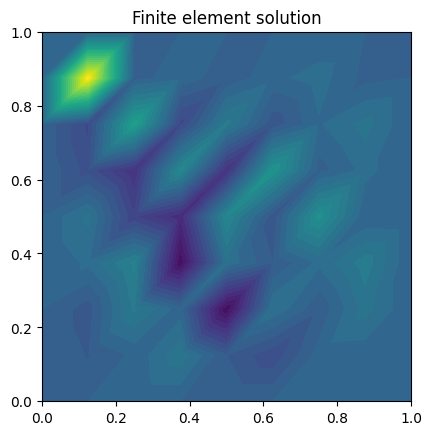

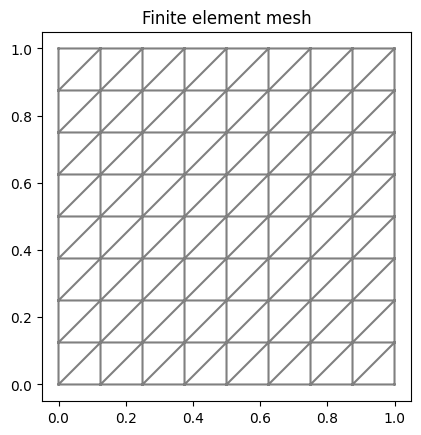

In [ ]:
mesh=UnitSquareMesh(8,8)
V = FunctionSpace(mesh, "P", 2) #Crea el espacio finito de funciones, la P hace referencia a la familia de elementos, en este caso la de Lagrange. El número representa el grado de interpolación

def boundary(x, on_boundary):
  return on_boundary #Indica si un punto esta en el borde

bc = DirichletBC(V, Constant(0), boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
D= Constant(3.43e5)
q = Constant(5.0e4)
a = inner(div(grad(u)), div(grad(v))) * dx

L = (q/D)*v*dx
# Compute solution
u = Function(V)
solve(a == L, u, bc);
print(np.array(u.vector()))
# Plot solution and mesh
plot(u, title="Finite element solution")
plt.show()
plot(mesh, title="Finite element mesh")

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_e9105333ce36f3462c0ac103fd3f581df0941b64

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    2
  Coefficients:              '[f_33, f_34]'
  Unique elements:           'CG2(?,?), R0(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'CG2(?,?), R0(?,?), Vector<2 x CG1(?,?)>, CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 4
INFO:FFC:  quadrature_degree: 4
INFO:FFC:  
INFO:FFC

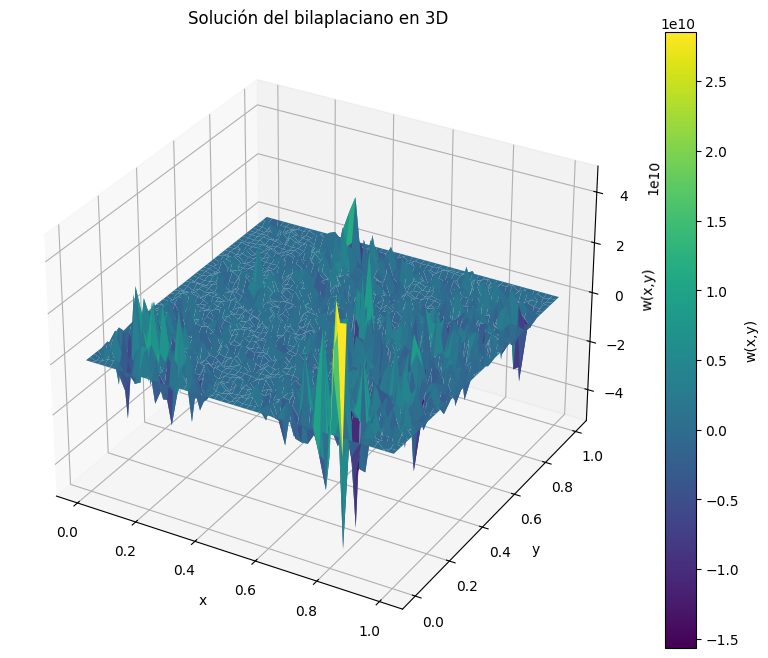

In [ ]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Crear la malla
mesh = UnitSquareMesh(32, 32)  # Malla cuadrada de 32x32 elementos

# 2. Definir el espacio funcional
V = FunctionSpace(mesh, "P", 2)  # Elementos finitos de grado 2

# 3. Definir las condiciones de contorno
def boundary(x, on_boundary):
    return on_boundary

# Condiciones de contorno: w = 0 en el contorno
bc1 = DirichletBC(V, Constant(0.0), boundary)
bcs = [bc1]

# 4. Definir las funciones
w = TrialFunction(V)  # Función de ensayo
v = TestFunction(V)   # Función de prueba
w_h = Function(V)     # Solución aproximada

# 5. Definir los parámetros del problema
D = Constant(1.0)  # Rigidez flexural
q = Expression("10.0", degree=2)  # Carga constante

# 6. Formulación débil
a = inner(div(grad(w)), div(grad(v))) * dx  # Término bilineal
L = (q / D) * v * dx                        # Término lineal

# 7. Resolver el sistema
solve(a == L, w_h, bcs)


# 9. Ploteo en 3D
# Crear una cuadrícula para evaluar la solución
n = 50  # Número de puntos por eje
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

# Evaluar la solución w_h en la cuadrícula
for i in range(n):
    for j in range(n):
        point = Point(X[i, j], Y[i, j])
        try:
            Z[i, j] = w_h(point)  # Valor de w_h en el punto (x,y)
        except:
            Z[i, j] = 0.0  # En caso de error (fuera del dominio)

# Crear la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Añadir barra de color
fig.colorbar(surf, ax=ax, label='w(x,y)')

# Etiquetas de los ejes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w(x,y)')
ax.set_title('Solución del bilaplaciano en 3D')

# Mostrar el gráfico
plt.show()

Vemos que esta opción no sirve ya que debería quedar simétrico asi que consideramos otra opción
### Segunda opción

Procediendo como en el caso de la barra podemos asumir que el problema esta relacionado con que no se especifica nada de condiciones de bordes de las derivadas asi que tomamos:
$
\left\{
\begin{align}
u &= \Delta w \\
\Delta u  &= \frac{q}{D}
\end{align}
\right.
$,
con $u=w=0$ en $\partial\Omega$

Luego procedemos a hallar las formulaciones débiles y por la proposición anterior queda:

$
\left\{
\begin{align}
\int_\Omega uv_1 & = -\int_\Omega \nabla w \cdot \nabla v_1 \\
-\int_\Omega \nabla u \cdot \nabla v_2  &= \int_\Omega \frac{q}{D}v_2
\end{align}
\right.
$

Así que si sumamos obtenemos la formulación débil

$\int_\Omega uv_1 + \int_\Omega \nabla w \cdot \nabla v_1 -\int_\Omega \nabla u \cdot \nabla v_2  = \int_\Omega \frac{q}{D}v_2$

Con condiciones de Dirichlet $u=w=0$ en $\partial\Omega$

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_58e300abeec02de43e538892ede3c675af114715

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00245214 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.619898 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representatio

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_6ab56968c6ffa883272fd990bd40fad8bf858cca

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00313807 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.01228 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_11dc44db950d6f3632374e62286a8720470e920e

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    2
  Coefficients:              '[f_13, f_14]'
  Unique elements:           'Mixed<CG2(?,?), CG2(?,?)>, R0(?,?), Vector<2 x CG1(?,?
                             )>'
  Unique sub elements:       'Mixed<CG2(?,?), CG2(?,?)>, R0(?,?), Vector<2 x CG1(?,?
                             )>, CG2(?,?), CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto -

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_3801828c0f66b7190a7fd5819465b3d5b34b9149

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00229192 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.00834322 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representat

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_4f750817ecc896f3bedcb4ff8c9f3352153b1b38

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00247431 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0107255 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_17d5bd7e022a45e71c9f390bd00f3f09885a1fd0

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00199533 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0128696 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling coordinate_mapping ffc_coordinate_mapping_3720490578293ae8ad5feabedc46584f48fda4c4

INFO:FFC:Compiler stage 1: Analyzing coordinate_mapping(s)
INFO:FFC:-------------------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00276279 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 0 elements
INFO:FFC:  Computing representation of 0 dofmaps
INFO:FFC:  Computing representation of 1 coordinate mappings
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.00916648 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:--------------------------------------------------------
INF

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_f118d197988c26a9a3020debbbeb96cc7b33faaf

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'Mixed<CG2(?,?), CG2(?,?)>, Vector<2 x CG1(?,?)>'
  Unique sub elements:       'Mixed<CG2(?,?), CG2(?,?)>, Vector<2 x CG1(?,?)>, CG2(?
                             ,?), CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 4
INFO:FFC:  quadrature_degree: 4
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0251513 seconds.

INFO:FFC:Compiler s

<Figure size 640x480 with 0 Axes>

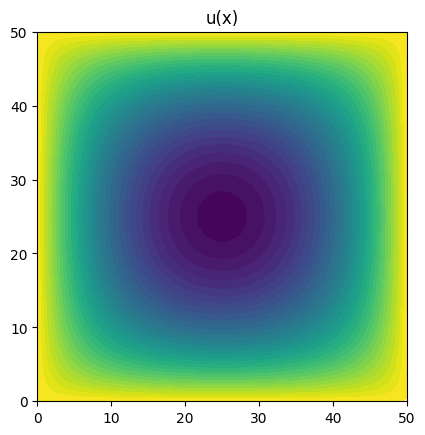

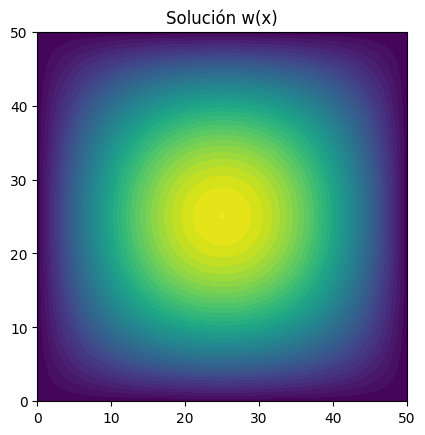

<Figure size 640x480 with 0 Axes>

In [ ]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt

# Malla
mesh = RectangleMesh(Point(0, 0), Point(50, 50), 90, 90)  # Malla de 32x32 elementos en [0,10]x[0,10]

# Definir elementos finitos y espacio mixto
V = FiniteElement("P", mesh.ufl_cell(), 2)  # Subimos a grado 3 para mayor estabilidad
W = FiniteElement("P", mesh.ufl_cell(), 2)  # Igual para w
M = FunctionSpace(mesh, MixedElement([V, W]))  # Espacio mixto

# Condiciones de borde
def boundary(x, on_boundary):
    return on_boundary

bc_u = DirichletBC(M.sub(0), Constant(0), boundary)  # u = 0
bc_w = DirichletBC(M.sub(1), Constant(0), boundary)  # w = 0
bcs = [bc_u, bc_w]

# Problema variacional mixto
(u, w) = TrialFunctions(M)
(v2, v1) = TestFunctions(M)
D= Constant(3.43e5)
q = Constant(5.0e4)
a = u*v1*dx + inner(grad(w),grad(v1))*dx - inner(grad(u),grad(v2))*dx
L = q/D * v2 * dx

# Resolver
sol = Function(M)
solve(a == L, sol, bcs);

# Extraer u y w
u, w = sol.split(deepcopy=True)

# Graficar
plt.figure()
plot(u, title="u(x)")
plt.figure()
plot(w, title="Solución w(x)")
plt.figure()

In [ ]:
print(w(20,20))

3374.5398130285157


In [ ]:
import pandas as pd
import random

# Generar 20 puntos aleatorios en el dominio [0,1] x [0,1]
np.random.seed(42)  # Para reproducibilidad
n_points = 20
points_x = np.random.uniform(0, 10, n_points)
points_y = np.random.uniform(0, 10, n_points)

# Evaluar w en los puntos aleatorios
w_values = []
for x, y in zip(points_x, points_y):
    point = Point(x, y)
    try:
        w_val = w(point)  # Evaluar w en el punto
        w_values.append(w_val)
    except:
        w_values.append(0.0)  # En caso de error (fuera del dominio o singularidad)

# Crear un DataFrame con las coordenadas y valores
data = {
    "coordenada x": points_x,
    "coordenada y": points_y,
    "valor de w": w_values
}
df = pd.DataFrame(data)

# Exportar a Excel
output_file = "w_values.xlsx"
df.to_excel(output_file, index=False)
print(f"Datos exportados a {output_file}")

Datos exportados a w_values.xlsx


In [ ]:
# Descargar el archivo en Colab
from google.colab import files
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
w(5,5)

np.float64(5.921798330054494)

## Conclusión

Vemos que la primer forma no sirve. Pero la segunda luego de comparar con el software de elementos finitos, dió bien.